In [1]:
import nltk
from nltk import word_tokenize,sent_tokenize,pos_tag
from nltk.corpus import stopwords
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /Users/Aditya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Aditya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import string
from collections import Counter
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
import community

<h2>Creating List of Characters and their Aliases</h2>

In [3]:
book_text = ""
stop_words = set(stopwords.words('english'))
fp = open("HP1.txt","r")
book_text = fp.read()
fp.close()

book_text = book_text.replace("\n"," ")
book_text = book_text.replace(",","")
string_regex = string.punctuation
string_regex.replace(" ","")
book_text = book_text.lower()
sentence_list = [i.rstrip(".") for i in sent_tokenize(book_text)]

name_dict={
           "james":["james potter","prongs"],
           "lily":["lily potter"],
           "harry":["harry potter","harry","boy who lived","potter","scarface","scar face","scar-face"],
           "draco":["draco malfoy","draco","malfoy"],
           "hermione":["hermione granger","hermione","granger"],
           "ron":["ronald weasley","ron weasley","ron","ronald"],
           "albus":["albus percival wulfric brian dumbledore","albus dumbledore","headmaster","albus","dumbledore"],
           "tom":["he who must not be named","he who shall not be named","you-know-who","you know who","youknowwho","voldemort","dark lord"],
           "snape":["severus snape","severus","snape"],
           "quirrell":["quirinus quirrell","quirinus","professor quirrell","quirrell"],
           "mcgonagall":["professor mcgonagall","minerva mcgonagall","minerva","mcgonagall"],
           "fred":["fred weasley","fred"],
           "george":["george weasley","george"],
           "neville":["neville longbottom","neville","mr. longbottom","longbottom"],
           "hagrid":["hagrid"],
           "dursleys":["mr. and mrs. dursley","mr. dursley","mrs. dursley","the dursleys","dursleys","vernon dursley","petunia dursley","vernon and petunia","vernon","petunia"],
           "dudley":["dudley"],
           "crabbe":["crabbe"],
           "goyle":["goyle"]
          }

sentence_list_replaced=sentence_list
for key in name_dict.keys():
  for j in name_dict[key]:
#     print(j,",",key)
    sentence_list_replaced = [sent.replace(j,key) for sent in sentence_list_replaced]
    

<h2> Creating the Adjacency Matrix </h2>

In [4]:
sentence_list =[[j for j in word_tokenize(i) if j not in stop_words] for i in sentence_list_replaced]
# print(sentence_list)
character_set = list(name_dict.keys())
# print(character_set)
d1 = {}
for i in character_set:
    d1[i] = {}
    for j in character_set:
        d1[i][j]=0

for i in sentence_list:
    for j in i:
        for k in i:
            if j!=k:
                try:
                    d1[j][k]+=1
                    d1[k][j]+=1
                except:
                    pass
print("   ",end="")
for i in d1:
    print(i,end=" ")
print()

for i in d1:
    print(i,end=" ")
    for j in d1[i]:
        print(d1[i][j],end="\t")
    print()

mat = np.matrix([[i for i in list(d1[i].values())] for i in d1])
# print(mat)

   james lily harry draco hermione ron albus tom snape quirrell mcgonagall fred george neville hagrid dursleys dudley crabbe goyle 
james 0	10	2	0	0	0	8	0	0	0	2	0	0	0	4	0	0	0	0	
lily 10	0	2	0	0	0	8	0	0	0	2	0	0	0	4	0	0	0	0	
harry 2	2	0	100	200	362	88	38	106	110	48	32	18	86	228	174	104	16	16	
draco 0	0	100	0	18	40	2	0	16	0	10	2	2	38	20	0	2	30	30	
hermione 0	0	200	18	0	178	10	0	34	16	18	0	0	38	40	2	0	2	2	
ron 0	0	362	40	178	0	22	10	30	8	10	4	10	40	52	0	2	8	20	
albus 8	8	88	2	10	22	0	10	6	2	24	0	0	2	38	6	8	0	0	
tom 0	0	38	0	0	10	10	0	16	16	2	0	0	0	22	2	0	0	0	
snape 0	0	106	16	34	30	6	16	0	46	10	4	6	4	28	2	0	2	2	
quirrell 0	0	110	0	16	8	2	16	46	0	6	0	0	0	4	0	0	0	0	
mcgonagall 2	2	48	10	18	10	24	2	10	6	0	0	0	6	16	0	0	2	2	
fred 0	0	32	2	0	4	0	0	4	0	0	0	38	2	2	0	0	2	2	
george 0	0	18	2	0	10	0	0	6	0	0	38	0	0	0	0	0	2	2	
neville 0	0	86	38	38	40	2	0	4	0	6	2	0	0	8	0	0	8	8	
hagrid 4	4	228	20	40	52	38	22	28	4	16	2	0	8	0	24	6	0	0	
dursleys 0	0	174	0	2	0	6	2	2	0	0	0	0	0	24	0	112	0	0	
dudley 0	0	104	2	0	

<h2>Generating the Graph </h2>

/Users/Aditya/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


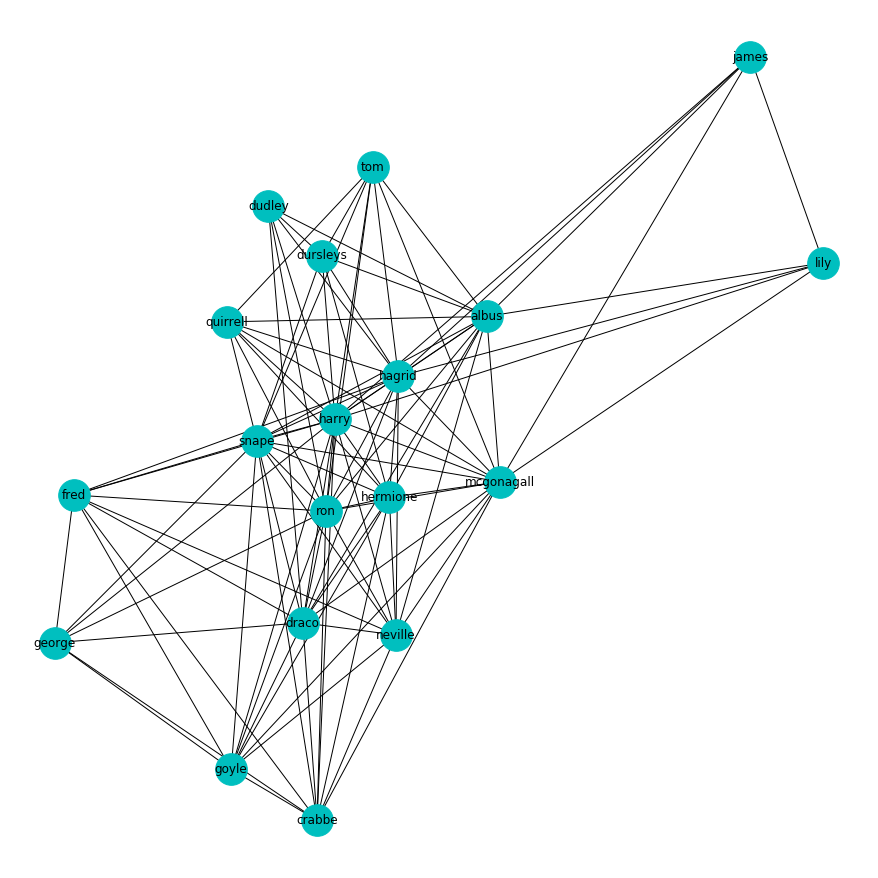

In [5]:
G=nx.from_numpy_matrix(mat)
G.edges(data=True)
mapping_list= list(name_dict.keys())
mapping_dict = {}
cnt=0

'''create a map between name and number of node to input to the relabel_nodes function'''
for i in mapping_list:
    mapping_dict[cnt]=i
    cnt+=1

H=nx.relabel_nodes(G,mapping_dict)
pos_fr = nx.fruchterman_reingold_layout(H)
plt.figure(figsize=(12,12))

nx.draw(H,pos=pos_fr, node_size=1000, node_color='c', with_labels=True)
#print(H.nodes())

<h2> Generation of the .gexf file </h2>

In [6]:
nx.write_gexf(H, "hp.gexf")


<p> Inference from gephi: 
    <br>
a) Number of nodes: 19
<br>
b) Number of edges: 101</p>

<h2> Actor Level Analysis</h2>

<h3>
    Degree Centrality
</h3>

<p>The degree centrality for Harry Potter is 1, because he is central to the story line and is the protagonist. Ron has second highest centrality because he's always with Harry and has an integral part to play too. Hermione follows as 3rd highest as she is a part of the friend group.</p>

In [7]:
print(nx.degree_centrality(H),"\n")

{'james': 0.2777777777777778, 'lily': 0.2777777777777778, 'harry': 1.0, 'draco': 0.7222222222222222, 'hermione': 0.6666666666666666, 'ron': 0.8333333333333333, 'albus': 0.7777777777777777, 'tom': 0.4444444444444444, 'snape': 0.8333333333333333, 'quirrell': 0.4444444444444444, 'mcgonagall': 0.7777777777777777, 'fred': 0.5, 'george': 0.38888888888888884, 'neville': 0.611111111111111, 'hagrid': 0.8333333333333333, 'dursleys': 0.38888888888888884, 'dudley': 0.3333333333333333, 'crabbe': 0.5555555555555556, 'goyle': 0.5555555555555556} 



<h3>
    Eigen Vector Centrality
</h3>

<p>
The eigenvector centrality is a measure of a character's influence. It's clear that Harry's influence is the most followed by Snape and Mcgonagall who are teachers at the school and hence very influential.    
</p>

In [8]:
print(nx.eigenvector_centrality(H),"\n")

{'james': 0.10705939804118815, 'lily': 0.10705939804118815, 'harry': 0.3272275353100832, 'draco': 0.2703112842582149, 'hermione': 0.2582910662892102, 'ron': 0.2987974655060781, 'albus': 0.26559940369378277, 'tom': 0.17733533867720302, 'snape': 0.29982023439855104, 'quirrell': 0.1859483430518438, 'mcgonagall': 0.2773459341831255, 'fred': 0.19686650057959773, 'george': 0.15542197380158848, 'neville': 0.24750676022148152, 'hagrid': 0.28103617389009444, 'dursleys': 0.148448431700531, 'dudley': 0.13540531068661488, 'crabbe': 0.21683041363226105, 'goyle': 0.21683041363226105} 



<h3>
   Closeness Centrality
</h3>

<p>
The closeness centrality is a measure of close a node is to all other nodes. Harry's closeness centrality is 1 as he is most central to the story.
</p>

In [9]:
print(nx.closeness_centrality(H),"\n")

{'james': 0.5806451612903226, 'lily': 0.5806451612903226, 'harry': 1.0, 'draco': 0.782608695652174, 'hermione': 0.75, 'ron': 0.8571428571428571, 'albus': 0.8181818181818182, 'tom': 0.6428571428571429, 'snape': 0.8571428571428571, 'quirrell': 0.6428571428571429, 'mcgonagall': 0.8181818181818182, 'fred': 0.6666666666666666, 'george': 0.6206896551724138, 'neville': 0.72, 'hagrid': 0.8571428571428571, 'dursleys': 0.6206896551724138, 'dudley': 0.6, 'crabbe': 0.6923076923076923, 'goyle': 0.6923076923076923} 



<h3>
    Effective Size of the Graph
</h3>

In [10]:
print(nx.effective_size(H),"\n")

{'james': 1.0, 'lily': 1.0, 'harry': 8.777777777777779, 'draco': 4.076923076923077, 'hermione': 3.5, 'ron': 5.666666666666666, 'albus': 5.857142857142858, 'tom': 1.75, 'snape': 5.533333333333333, 'quirrell': 1.25, 'mcgonagall': 5.428571428571429, 'fred': 1.8888888888888893, 'george': 1.0, 'neville': 2.2727272727272734, 'hagrid': 6.7333333333333325, 'dursleys': 2.1428571428571432, 'dudley': 1.666666666666667, 'crabbe': 2.0, 'goyle': 2.0} 



<h3>
Edge Betweenness Centrality
</h3>

<p>
The edge betweenness centrality of James-Harry is the most meaning that most shortest paths go through this edge followed by Lily-Harry. The edge betweenness centrality of Crabbe-Goyle is the least meaning this edge has the least number of shortest paths passing through it.
</p>


In [11]:
edge_bet=nx.edge_betweenness_centrality(H)
x=list()
for key in edge_bet:
  x.append([key,edge_bet[key]])


x=sorted(x,key=lambda ele: ele[1],reverse=True)
print(x)

[[('james', 'harry'), 0.034600389863547756], [('lily', 'harry'), 0.034600389863547756], [('harry', 'george'), 0.031732108047897514], [('harry', 'dudley'), 0.0239766081871345], [('harry', 'dursleys'), 0.023447507658033974], [('fred', 'hagrid'), 0.023099415204678363], [('james', 'hagrid'), 0.022904483430799216], [('lily', 'hagrid'), 0.022904483430799216], [('james', 'mcgonagall'), 0.021929824561403508], [('lily', 'mcgonagall'), 0.021929824561403508], [('ron', 'dudley'), 0.02091339459760512], [('snape', 'dursleys'), 0.02052353104984684], [('harry', 'fred'), 0.020467836257309937], [('james', 'albus'), 0.01998050682261208], [('lily', 'albus'), 0.01998050682261208], [('harry', 'crabbe'), 0.019792536897800056], [('harry', 'goyle'), 0.019792536897800056], [('harry', 'tom'), 0.01895711500974659], [('harry', 'quirrell'), 0.018629908103592316], [('draco', 'dudley'), 0.018421052631578946], [('hagrid', 'dudley'), 0.018128654970760234], [('snape', 'george'), 0.01808688387635756], [('mcgonagall', 'cr

<h2>
Analysing the overall cohesiveness of the network, diversity of degree etc.
</h2>

<h3>Diameter
</h3>

In [12]:
nx.diameter(H)

2

<h3>Average Shortest Path Length</h3>

In [13]:
nx.average_shortest_path_length(H)

1.409356725146199

<h3>Size of Largest Component of the Graph</h3>

In [14]:
[len(c) for c in sorted(nx.connected_components(H), key=len, reverse=True)]

[19]

<h3>Degree Assortativity Coeffecient</h3>

In [15]:
#Degree Assortavity Coefficient
nx.degree_assortativity_coefficient(H)

-0.2630447397003469

<h3>Effective Size of Ego Graph</h3>

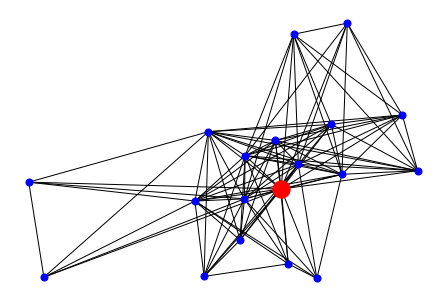

In [16]:
hub_ego = nx.ego_graph(H, "harry")

# Draw graph
pos = nx.spring_layout(hub_ego)
nx.draw(hub_ego, pos, node_color='b', node_size=50, with_labels=False)
# Draw ego as large and red
nx.draw_networkx_nodes(hub_ego, pos, nodelist=["harry"], node_size=300, node_color='r')
plt.show(hub_ego)

In [17]:
nx.effective_size(hub_ego)

{'james': 1.0,
 'lily': 1.0,
 'harry': 8.777777777777779,
 'draco': 4.076923076923077,
 'hermione': 3.5,
 'ron': 5.666666666666666,
 'albus': 5.857142857142858,
 'tom': 1.75,
 'snape': 5.533333333333333,
 'quirrell': 1.25,
 'mcgonagall': 5.428571428571429,
 'fred': 1.8888888888888893,
 'george': 1.0,
 'neville': 2.2727272727272734,
 'hagrid': 6.7333333333333325,
 'dursleys': 2.1428571428571432,
 'dudley': 1.666666666666667,
 'crabbe': 2.0,
 'goyle': 2.0}

<h3>
Degree Distribution of Graph 
</h3>

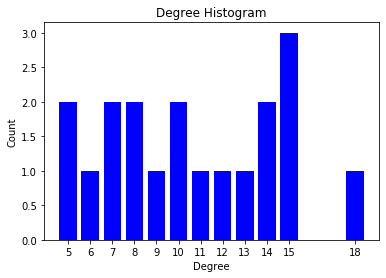

In [18]:
import collections
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d for d in deg])


"""# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)"""

plt.show()

<h3>Global Clustering Coefficient of the Graph </h3>

In [19]:
G = nx.average_clustering(H)
print(G)

0.8079250299064542


<h3>Local Clustering Coefficent of all Nodes</h3>

In [20]:
nx.clustering(H)

{'james': 1.0,
 'lily': 1.0,
 'harry': 0.5424836601307189,
 'draco': 0.7435897435897436,
 'hermione': 0.7727272727272727,
 'ron': 0.6666666666666666,
 'albus': 0.6263736263736264,
 'tom': 0.8928571428571429,
 'snape': 0.6761904761904762,
 'quirrell': 0.9642857142857143,
 'mcgonagall': 0.6593406593406593,
 'fred': 0.8888888888888888,
 'george': 1.0,
 'neville': 0.8727272727272727,
 'hagrid': 0.5904761904761905,
 'dursleys': 0.8095238095238095,
 'dudley': 0.8666666666666667,
 'crabbe': 0.8888888888888888,
 'goyle': 0.8888888888888888}

<h3>Finding Community in the Graph using Louvain Percolation</h3>

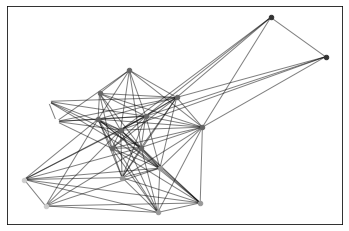

In [26]:
partition = community.best_partition(H)

size = float(len(set(partition.values())))
pos = nx.spring_layout(H)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(H, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(H, pos, alpha=0.5)
plt.show()

<h2>Conclusion</h2>

<ul>
    <li>Our analysis suggests that Harry Potter is the <em>most</em> important character in the story as the degree centrality and closeness related to him is the highest - 1.0. This stands with what we know, that he is the novel's protagonist. </li>
    
<li>Along with this, it can also be seen that Ron, Hermione and Hagrid played an integral role in the book. However, it's still clear that the <em>ego center is Harry</em>.</li>

<li>The eigen vector centrality and the closeness of the characters, represent their influence and how close they are to the others in consideration. This tells us how the story revolves around 4 characters: Harry, Hermione, Ron and Hagrid.</li> 

<li>It is apparent that Harry is the most influential character as compared to the other characters of the book. Each and every character is mentioned in context with Harry as is visible from the high degree of Harry's node - 18 - equal to the number of characters not including Harry. Hence, every character is at the very least connected through Harry. This is why the diameter - the maximum number of edges needed to be traversed to go from any node A to any node B along the shortest path connecting the two - is 2 because they're either direct connections or connected through Harry.</li>

<li>The average shortest path - 1.4 - shows that it is a highly connected graph, and since diameter - the upper limit - is 2, and the minimum is 1, because the average is below 1.5 it can be observed that most of them are connected directly.</li>

<li>Upon analysing the ego network of the graph, we see that the largest hub of the network is inutuitively Harry. Harry, Hargrid, Ron and Hermione have the greatest network size which agrees with our analysis of them being central to the story.</li>

<li>Also the average clustering coefficient being 0.8 shows us that most nodes can be clustered with each other saying a lot about their closeness/similiarity.</li>



</ul>

<p>Hence, we conclude that the network graphed is a fairly accurate representation of the social dynamics of Harry Potter Book I - The Philosophers Stone.</p>

<h4>Gephi Analysis</h4>

<ul><li>

If we analyse Harry’s connections, we see that his connections with Lily, James, Neville, Ron, Hermione are purple in colour. (i.e. they are close connections)
</li><li>

From the eccentricity analysis: We see that Harry’s edge connection with any other node is green (i.e. 1). This is because Harry is directly connected to every other character in the graph.
</li><li>

On checking hubs, we see that Harry is a big hub for most people in the graph. We see that all the main characters are hubs for Harry.
</li></ul>